# 📌 TITANIC DATA SET EDA

This exploratory data analysis (EDA) project investigates survival patterns of passengers aboard the RMS Titanic, using the Titanic dataset. The primary objective is to understand how various factors — such as gender, class, age, embarkation point, and family relationships — influenced the likelihood of survival during the disaster.

#### 📈 Tools & Techniques Used:
- Python libraries: `pandas`, `numpy`, `matplotlib`, `seaborn`
- Descriptive statistics, cross-tabulations, and visualizations
- Feature engineering (e.g., `Has Cabin`, family size groupings)
- Correlation matrix to assess linear relationships


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as mp 
import seaborn as sb 
import sys

In [2]:
df=pd.read_csv(r"C:\Users\vishn\DA_Learn_Project\Pandas\DataSets\titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.set_index('PassengerId',inplace=True)

In [4]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Survived                   891 non-null    int64  
 1   Pclass                     891 non-null    int64  
 2   Name                       891 non-null    object 
 3   Sex                        891 non-null    object 
 4   Age                        714 non-null    float64
 5   Sibilings/Spouse On Board  891 non-null    int64  
 6   Parents/Children On Board  891 non-null    int64  
 7   Ticket                     891 non-null    object 
 8   Fare                       891 non-null    float64
 9   Cabin                      204 non-null    object 
 10  Embarked                   891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [27]:
df.describe()

,Survived,Pclass,Age,Sibilings/Spouse On Board,Parents/Children On Board,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df = df.rename(columns={'SibSp':'Sibilings/Spouse On Board','Parch':'Parents/Children On Board'})
df

,Survived,Pclass,Name,Sex,Age,Sibilings/Spouse On Board,Parents/Children On Board,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [6]:
df['Embarked'] = df['Embarked'].str.strip().str.upper()
df['Embarked'] = df['Embarked'].map({'C': 'Cherbourg', 'S': 'Southampton', 'Q': 'Queenstown'}).fillna('N/A')
df


,Survived,Pclass,Name,Sex,Age,Sibilings/Spouse On Board,Parents/Children On Board,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,Southampton
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,Southampton
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,Southampton


In [18]:
df1 =  df.groupby('Sex').agg(
    total_passengers = ('Survived', 'count'),
    survivors = ('Survived', 'sum')
)
df1

,total_passengers,survivors
Sex,,
female,314,233
male,577,109


In [25]:
df1['% survivors'] = ((df1['survivors']/df1['total_passengers'])*100).round(2)
df1

,total_passengers,survivors,% survivors
Sex,,,
female,314,233,74.20
male,577,109,18.89


In [32]:
df2 =  df.groupby('Pclass').agg(
    total_passengers = ('Survived', 'count'),
    survivors = ('Survived', 'sum')
)
df2['% survivors'] = ((df2['survivors']/df2['total_passengers'])*100).round(2)
df2

,total_passengers,survivors,% survivors
Pclass,,,
1,216,136,62.96
2,184,87,47.28
3,491,119,24.24


Age    Axes(0.125,0.11;0.775x0.77)
dtype: object

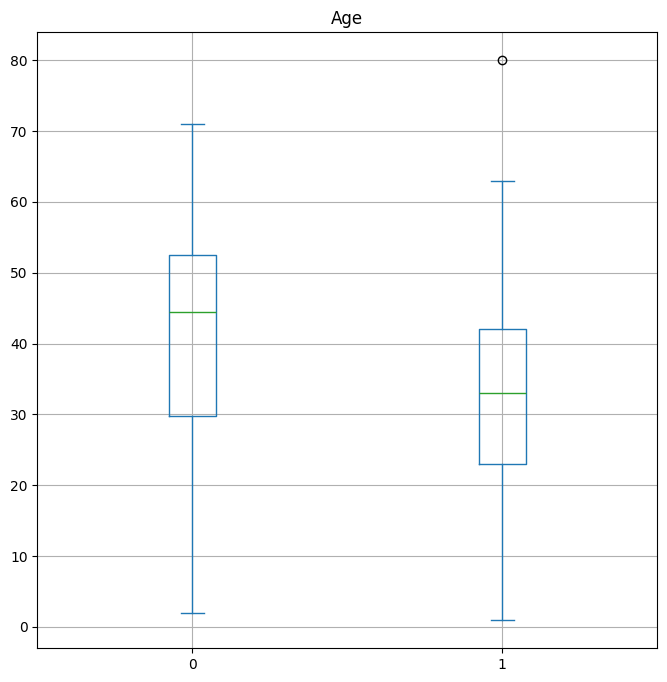

In [47]:
df.dropna().plot.box(column='Age', by='Survived',grid=True,figsize=(8,8))


In [57]:
pd.DataFrame(df.groupby('Sex')[['Age','Pclass','Fare']].mean().round(1))

,Age,Pclass,Fare
Sex,,,
female,27.9,2.2,44.5
male,30.7,2.4,25.5


In [63]:
pd.DataFrame(df.corr(numeric_only=True))

,Survived,Pclass,Age,Sibilings/Spouse On Board,Parents/Children On Board,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
Sibilings/Spouse On Board,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parents/Children On Board,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


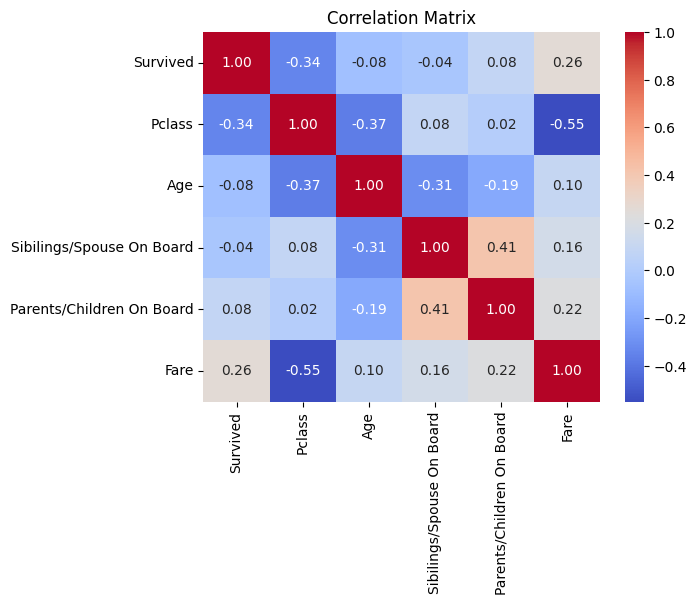

In [64]:

corr = df.corr(numeric_only=True)
sb.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
mp.title("Correlation Matrix")
mp.show()

In [72]:
pd.crosstab(df['Survived'], df['Sibilings/Spouse On Board'], normalize='columns').round(2)*100


Sibilings/Spouse On Board,0,1,2,3,4,5,8
Survived,,,,,,,
0,65.0,46.0,54.0,75.0,83.0,100.0,100.0
1,35.0,54.0,46.0,25.0,17.0,0.0,0.0


In [73]:
pd.crosstab(df['Survived'], df['Parents/Children On Board'], normalize='columns').round(2)*100

Parents/Children On Board,0,1,2,3,4,5,6
Survived,,,,,,,
0,66.0,45.0,50.0,40.0,100.0,80.0,100.0
1,34.0,55.0,50.0,60.0,0.0,20.0,0.0


In [75]:
df4 = df.groupby('Embarked').agg(
    total_passengers=('Survived', 'count'),
    survivors=('Survived', 'sum'),
    survival_rate=('Survived', lambda x: round(x.mean() * 100, 2))
)
df4

,total_passengers,survivors,survival_rate
Embarked,,,
Cherbourg,168,93,55.36
N/A,2,2,100.00
Queenstown,77,30,38.96
Southampton,644,217,33.70


In [77]:
df['Has Cabin'] = np.where(df['Cabin'].isna(), 'No', 'Yes')
df

,Survived,Pclass,Name,Sex,Age,Sibilings/Spouse On Board,Parents/Children On Board,Ticket,Fare,Cabin,Embarked,Has Cabin
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton,No
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,Yes
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton,No
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton,Yes
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton,No
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,Southampton,No
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,Southampton,Yes
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,Southampton,No


In [78]:
df5 = df.groupby('Has Cabin').agg(
    total_passengers=('Survived', 'count'),
    survivors=('Survived', 'sum'),
    survival_rate=('Survived', lambda x: round(x.mean() * 100, 2))
)
df5

,total_passengers,survivors,survival_rate
Has Cabin,,,
No,687,206,29.99
Yes,204,136,66.67


# Insights from the Titanic Dataset

Here are key insights derived from the dataset, highlighting factors influencing survival:

---

## I. General Overview & Demographics

* **Number of Classes:** 3
* **Number of Boarding Points:** 3
* **Total Passengers On Board:** 819
* **Total Allotted Cabins:** 204
* **Overall Survival Rate:** 38.4%
* **Average Age Onboard:** 29 years, 8 months
* **Average Fare:** 32 Euros (Max: 512 Euros, Min: 0 Euros)
* **Passenger Sex Ratio:** Male:Female :: 577:314

---

## II. Survival by Key Factors

### A. Gender
* **Females:** 74% survival rate
* **Males:** Only 19% survival rate
    * **Insight:** There was a significant disparity in survival rates, with females having a much higher chance of survival.

### B. Passenger Class (Pclass)
* **Passenger Distribution:**
    * 1st Class: 216 passengers
    * 2nd Class: 184 passengers
    * 3rd Class: 491 passengers
* **Survival Rates by Class:**
    * 1st Class: 63%
    * 2nd Class: 47%
    * 3rd Class: 24%
    * **Insight:** A strong correlation exists: the higher the passenger class (i.e., the richer you are), the more likely you were to survive.

### C. Age
* Most survivors fell between the ages of 22-42.
* One unlikely survivor was aged 80.
* Generally, no one beyond age 62 survived (excluding the 80-year-old outlier).
* **Observation:** Females on board were generally younger, traveled in higher classes, and paid higher fares compared to their male counterparts.

### D. Boarding Point
* **Cherbourg:** 55% survival rate
* **Southampton:** 39% survival rate
* **Queenstown:** 34% survival rate
    * **Insight:** Passengers boarding at Cherbourg had a notably higher survival rate.

### E. Cabin Allotment
* **With Cabin:** 67% survival rate
* **Without Cabin:** Only 3 out of 10 (30%) survived
    * **Insight:** Having an allotted cabin significantly increased the likelihood of survival.

---

## III. Correlation & Family Size

### A. Correlation Matrix Summary
* **Passenger Class (`Pclass`):** Lower passenger class strongly correlates with a lower chance of survival.
* **Fare:** Higher fare has a moderately positive correlation with survival.
* **Age & Companions:** Age and having companions (siblings/spouse, parents/children) had very negligible linear correlation with survival.
    * **Overall:** If you had money in abundance (higher class, higher fare), the likelihood of survival increased.

### B. Family Size (Siblings/Spouse On Board)
* **No Siblings/Spouse:** Approximately 2/3 chances of *not* surviving.
* **1 or 2 Siblings/Spouses:** Odds of survival increase.
* **More than 2 Siblings/Spouses:** Survival chances drastically decrease.

### C. Family Size (Parents/Children On Board)
* A similar trend is observed with the number of parents/children on board.

---

## IV. Final Takeaways

* **Socio-economic Status is Paramount:** The ability to afford a 1st class ticket was a critical determinant of survival.
* **Gender Bias:** The disaster tragically highlighted a significant gender bias in survival rates, favoring females.
* **Cabin Access:** Having a cabin was a strong indicator of survival.
* **Family Group Dynamics:** While some companions improved odds, larger family groups faced significantly reduced survival chances.
* **Harsh Reality:** The data starkly illustrates that survival was heavily influenced by privilege and circumstance.